In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import nltk
import json
import datetime
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from tabulate import tabulate

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUNYLoaner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUNYLoaner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Loading the CSV Files accordingly
subreddit = pd.read_csv("subreddit.csv")
subreddit_posts = pd.read_csv("subreddit_posts.csv")
subreddit_posts_comments = pd.read_csv("subreddit_posts_comments.csv")
youtube_channels = pd.read_csv("youtube_channels.csv")
youtube_channel_videos = pd.read_csv("youtube_channel_videos.csv")
youtube_videos_comments = pd.read_csv("youtube_videos_comments.csv")

In [3]:
all_tables_description = pd.DataFrame({
    'subreddit': [
        [{'s_id': 'SERIAL PRIMARY KEY'}],
        [{'subreddit_date_time': 'timestamp'}],
        [{'subreddit_title': 'VARCHAR'}],
        [{'subreddit_name': 'VARCHAR'}],
        [{'subreddit_id': 'VARCHAR'}],
        [{'subreddit_url': 'TEXT'}],
        [{'subreddit_description': 'TEXT'}],
        [{'subreddit_subscribers': 'BIGINT'}],
        [{'subreddit_data': 'JSON'}],
        [{'Data Count': len(subreddit)}],
        ['-'],
        ['-'],
        ['-'],
        ['-'],
        ['-']
    ],
    'subreddit_posts': [
        [{'p_id': 'SERIAL PRIMARY KEY'}],
        [{'post_date_time': 'timestamp'}],
        [{'post_id': 'VARCHAR'}],
        [{'subreddit_id': 'VARCHAR FOREIGN KEY REFERENCES subreddits'}],
        [{'subreddit_url': 'TEXT'}],
        [{'post_name': 'VARCHAR'}],
        [{'post_url': 'TEXT'}],
        [{'post_title': 'TEXT'}],
        [{'post_data': 'JSON'}],
        [{'post_categorized': 'INTEGER'}],
        [{'post_class': 'VARCHAR'}],
        [{'post_confidence': 'NUMERIC'}],
        [{'Data Count': len(subreddit_posts)}],
        ['-'],
        ['-']
    ],
    'subreddit_posts_comments': [
        [{'c_id': 'SERIAL PRIMARY KEY'}],
        [{'comment_date_time': 'timestamp'}],
        [{'comment_id': 'VARCHAR'}],
        [{'post_id': 'VARCHAR FOREIGN KEY REFERENCES subreddit_posts'}],
        [{'post_name': 'VARCHAR'}],
        [{'post_url': 'TEXT'}],
        [{'subreddit_id': 'VARCHAR FOREIGN KEY REFERENCES subreddits'}],
        [{'subreddit_name': 'VARCHAR'}],
        [{'subreddit_url': 'TEXT'}],
        [{'comment_body': 'TEXT'}],
        [{'comment_data': 'JSON'}],
        [{'comment_categorized': 'INTEGER'}],
        [{'comment_class': 'VARCHAR'}],
        [{'comment_confidence': 'NUMERIC'}],
        [{'Data Count': len(subreddit_posts_comments)}]
    ],
    'youtube_channels': [
        [{'yc_id': 'SERIAL PRIMARY KEY'}],
        [{'yc_date_time': 'timestamp'}],
        [{'yc_name_title': 'VARCHAR'}],
        [{'youtube_channel_id': 'VARCHAR'}],
        [{'yc_url': 'TEXT'}],
        [{'yc_custom_url': 'TEXT'}],
        [{'yc_description': 'TEXT'}],
        [{'yc_data': 'JSON'}],
        [{'Data Count': len(youtube_channels)}],
        ['-'],
        ['-'],
        ['-'],
        ['-'],
        ['-'],
        ['-']
    ],
    'youtube_channel_videos': [
        [{'ycv_id': 'SERIAL PRIMARY KEY'}],
        [{'ycv_date_time': 'timestamp'}],
        [{'ycvideo_id': 'VARCHAR'}],
        [{'youtube_channel_id': 'VARCHAR FOREIGN KEY REFERENCES youtube_channels'}],
        [{'yc_name_title': 'VARCHAR'}],
        [{'yc_url': 'TEXT'}],
        [{'ycv_name_title': 'TEXT'}],
        [{'ycv_url': 'TEXT'}],
        [{'ycv_description': 'TEXT'}],
        [{'ycv_data': 'JSON'}],
        [{'ycv_categorized': 'INTEGER'}],
        [{'ycv_class': 'VARCHAR'}],
        [{'ycv_confidence': 'NUMERIC'}],
        [{'Data Count': len(youtube_channel_videos)}],
        ['-']
    ],
    'youtube_videos_comments': [
        [{'ycvc_id': 'SERIAL PRIMARY KEY'}],
        [{'ycvc_date_time': 'timestamp'}],
        [{'ycvcomment_id': 'VARCHAR'}],
        [{'ycvideo_id': 'VARCHAR FOREIGN KEY REFERENCES youtube_channel_videos'}],
        [{'ycv_url': 'TEXT'}],
        [{'youtube_channel_id': 'VARCHAR FOREIGN KEY REFERENCES youtube_channels'}],
        [{'yc_url': 'TEXT'}],
        [{'ycvc_body': 'TEXT'}],
        [{'ycvc_data': 'JSON'}],
        [{'ycvc_categorized': 'INTEGER'}],
        [{'ycvc_class': 'VARCHAR'}],
        [{'ycvc_confidence': 'NUMERIC'}],
        [{'Data Count': len(youtube_videos_comments)}],
        ['-'],
        ['-']
    ]
},index = None)

In [4]:
all_tables_description

,subreddit,subreddit_posts,subreddit_posts_comments,youtube_channels,youtube_channel_videos,youtube_videos_comments
0,[{'s_id': 'SERIAL PRIMARY KEY'}],[{'p_id': 'SERIAL PRIMARY KEY'}],[{'c_id': 'SERIAL PRIMARY KEY'}],[{'yc_id': 'SERIAL PRIMARY KEY'}],[{'ycv_id': 'SERIAL PRIMARY KEY'}],[{'ycvc_id': 'SERIAL PRIMARY KEY'}]
1,[{'subreddit_date_time': 'timestamp'}],[{'post_date_time': 'timestamp'}],[{'comment_date_time': 'timestamp'}],[{'yc_date_time': 'timestamp'}],[{'ycv_date_time': 'timestamp'}],[{'ycvc_date_time': 'timestamp'}]
2,[{'subreddit_title': 'VARCHAR'}],[{'post_id': 'VARCHAR'}],[{'comment_id': 'VARCHAR'}],[{'yc_name_title': 'VARCHAR'}],[{'ycvideo_id': 'VARCHAR'}],[{'ycvcomment_id': 'VARCHAR'}]
3,[{'subreddit_name': 'VARCHAR'}],[{'subreddit_id': 'VARCHAR FOREIGN KEY REFEREN...,[{'post_id': 'VARCHAR FOREIGN KEY REFERENCES s...,[{'youtube_channel_id': 'VARCHAR'}],[{'youtube_channel_id': 'VARCHAR FOREIGN KEY R...,[{'ycvideo_id': 'VARCHAR FOREIGN KEY REFERENCE...
4,[{'subreddit_id': 'VARCHAR'}],[{'subreddit_url': 'TEXT'}],[{'post_name': 'VARCHAR'}],[{'yc_url': 'TEXT'}],[{'yc_name_title': 'VARCHAR'}],[{'ycv_url': 'TEXT'}]
5,[{'subreddit_url': 'TEXT'}],[{'post_name': 'VARCHAR'}],[{'post_url': 'TEXT'}],[{'yc_custom_url': 'TEXT'}],[{'yc_url': 'TEXT'}],[{'youtube_channel_id': 'VARCHAR FOREIGN KEY R...
6,[{'subreddit_description': 'TEXT'}],[{'post_url': 'TEXT'}],[{'subreddit_id': 'VARCHAR FOREIGN KEY REFEREN...,[{'yc_description': 'TEXT'}],[{'ycv_name_title': 'TEXT'}],[{'yc_url': 'TEXT'}]
7,[{'subreddit_subscribers': 'BIGINT'}],[{'post_title': 'TEXT'}],[{'subreddit_name': 'VARCHAR'}],[{'yc_data': 'JSON'}],[{'ycv_url': 'TEXT'}],[{'ycvc_body': 'TEXT'}]
8,[{'subreddit_data': 'JSON'}],[{'post_data': 'JSON'}],[{'subreddit_url': 'TEXT'}],[{'Data Count': 16}],[{'ycv_description': 'TEXT'}],[{'ycvc_data': 'JSON'}]
9,[{'Data Count': 20}],[{'post_categorized': 'INTEGER'}],[{'comment_body': 'TEXT'}],[-],[{'ycv_data': 'JSON'}],[{'ycvc_categorized': 'INTEGER'}]


In [5]:
def post_video_data_count(subreddit_posts,youtube_channel_videos):
    # Assuming your DataFrame is named df and 'date_time' is the column containing date-time values
    subreddit_posts['post_date_time'] = pd.to_datetime(subreddit_posts['post_date_time'])
    youtube_channel_videos['ycv_date_time'] = pd.to_datetime(youtube_channel_videos['ycv_date_time'])
    subreddit_posts['post_date'] = subreddit_posts['post_date_time'].dt.date
    youtube_channel_videos['ycv_date'] = youtube_channel_videos['ycv_date_time'].dt.date
    dates_till_now =  subreddit_posts['post_date_time'].dt.date.unique()
    
    # Count the number of rows for each unique date present in 'dates_till_now'
    reddit_posts_daily_counts = subreddit_posts[subreddit_posts['post_date'].isin(dates_till_now)].groupby('post_date').size().reset_index(name='post_count')
    youtube_videos_daily_counts = youtube_channel_videos[youtube_channel_videos['ycv_date'].isin(dates_till_now)].groupby('ycv_date').size().reset_index(name='video_count')

    # Plotting
    plt.figure(figsize=(12, 6))
    #reddit_posts_daily_counts.plot(kind='line', marker='o', linestyle='-', color='blue', label='Reddit Posts Daily Counts')
    #youtube_videos_daily_counts.plot(kind='line', marker='o', linestyle='-', color='red', label='YouTube Videos Daily Counts')
    plt.plot(reddit_posts_daily_counts['post_date'], reddit_posts_daily_counts['post_count'], marker='o', linestyle='-', color='blue', label='Reddit Posts Daily Counts')
    plt.plot(youtube_videos_daily_counts['ycv_date'], youtube_videos_daily_counts['video_count'], marker='o', linestyle='-', color='red', label='YouTube Videos Daily Counts')
    plt.title('Reddit Posts Count vs Youtube Video Count (Number of New Entries per Day)')
    plt.xlabel('Date (Starting 1st November)')
    plt.ylabel('Count')
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.legend()
    plt.savefig('Reddit Posts Count vs Youtube Video Count (Number of New Entries per Day).jpg')
    #plt.show()

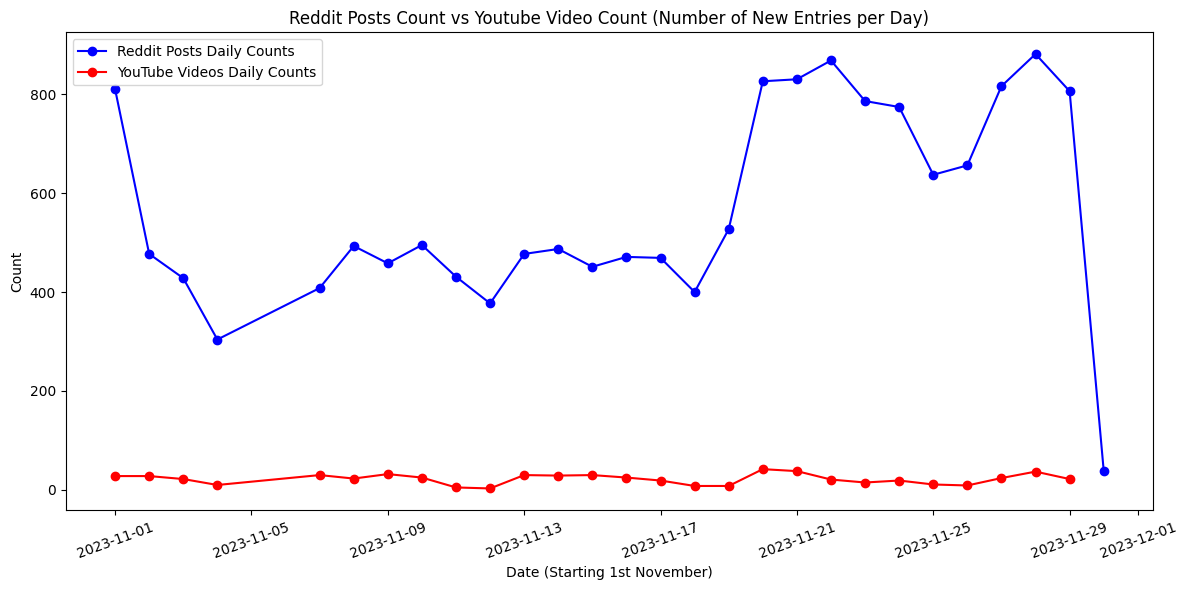

In [6]:
post_video_data_count(subreddit_posts,youtube_channel_videos)

In [7]:
def reddit_vs_youtube_comment_count(subreddit_posts_comments, youtube_videos_comments):
    # Assuming your DataFrame is named df and 'date_time' is the column containing date-time values
    subreddit_posts_comments['comment_date_time'] = pd.to_datetime(subreddit_posts_comments['comment_date_time'], errors='coerce')
    youtube_videos_comments['ycvc_date_time'] = pd.to_datetime(youtube_videos_comments['ycvc_date_time'])
    subreddit_posts_comments['comment_date']= subreddit_posts_comments['comment_date_time'].dt.date
    youtube_videos_comments['ycvc_date'] = youtube_videos_comments['ycvc_date_time'].dt.date
    comments_dates_till_now =  subreddit_posts_comments['comment_date_time'].dt.date.unique()
    
    # Count the number of rows for each unique date present in 'dates_till_now'
    reddit_comments_daily_counts = subreddit_posts_comments[subreddit_posts_comments['comment_date'].isin(comments_dates_till_now)].groupby('comment_date').size().reset_index(name='reddit_comment_count')
    youtube_comments_daily_counts = youtube_videos_comments[youtube_videos_comments['ycvc_date'].isin(comments_dates_till_now)].groupby('ycvc_date').size().reset_index(name='youtube_comment_count')

    # Plotting
    plt.figure(figsize=(12, 6))
    #reddit_posts_daily_counts.plot(kind='line', marker='o', linestyle='-', color='blue', label='Reddit Posts Daily Counts')
    #youtube_videos_daily_counts.plot(kind='line', marker='o', linestyle='-', color='red', label='YouTube Videos Daily Counts')
    plt.plot(reddit_comments_daily_counts['comment_date'], reddit_comments_daily_counts['reddit_comment_count'], marker='o', linestyle='-', color='darkblue', label='Reddit Comments Daily Counts')
    plt.plot(youtube_comments_daily_counts['ycvc_date'], youtube_comments_daily_counts['youtube_comment_count'], marker='o', linestyle='-', color='darkorange', label='YouTube Comments Daily Counts')
    plt.title('Reddit Comments Count vs Youtube Video Comments Count (Number of New Entries per Day)')
    plt.xlabel('Date (Starting 1st November)')
    plt.ylabel('Comments Count')
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.legend()
    plt.savefig('Reddit Comments Count vs Youtube Video Comments Count (Number of New Entries per Day).jpg')
    #plt.show()

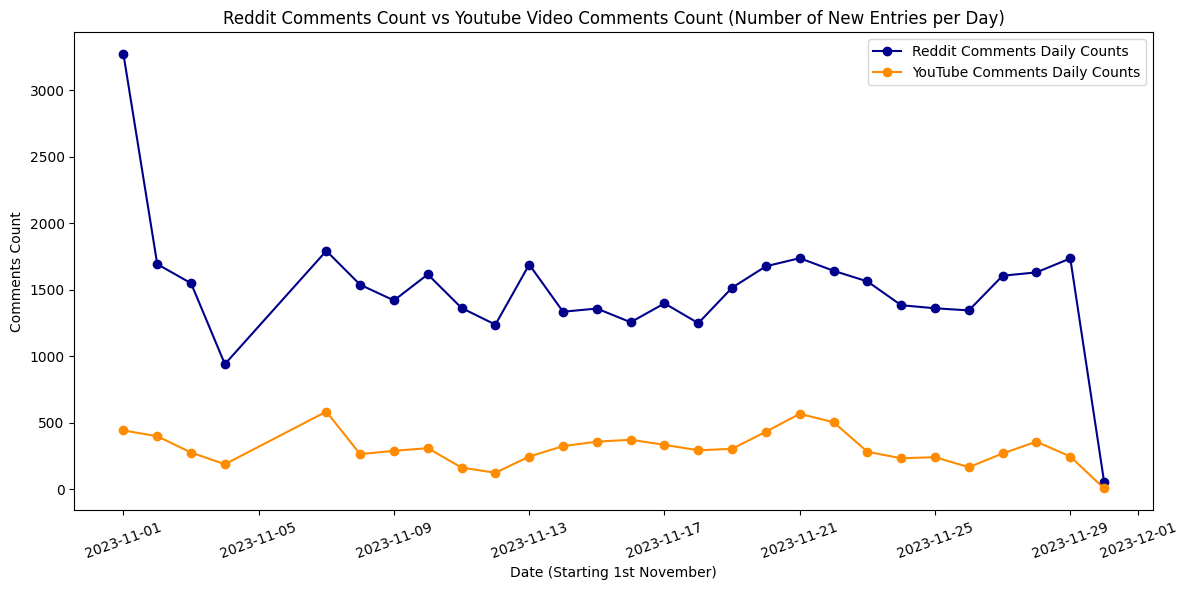

In [8]:
reddit_vs_youtube_comment_count(subreddit_posts_comments, youtube_videos_comments)

In [9]:
def reddit_posts_ModerateHatespeech(subreddit_posts):
    # Plotting the histogram
    plt.figure(figsize=(6, 10))
    
    # Count occurrences of 'yes' and 'no'
    subreddt_posts_flag_counts = subreddit_posts['post_class'].value_counts()
    
    # Plotting the histogram
    bars = plt.bar(subreddt_posts_flag_counts.index, subreddt_posts_flag_counts.values, color=['green', 'red'])
    
    # Annotate each bar with count and ratio
    for bar, count in zip(bars, subreddt_posts_flag_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({count / len(subreddit_posts):.2%})', ha='center', va='bottom')
    # Customize the plot
    plt.title('Classification of Reddit Posts from ModerateHatespeech')
    plt.xlabel('ModerateHatespeech (Normal / Flag)')
    plt.ylabel('Total Count')
    #plt.legend()
    plt.savefig('Classification of Reddit Posts from ModerateHatespeech.jpg')
    # Display the plot
    #plt.show()

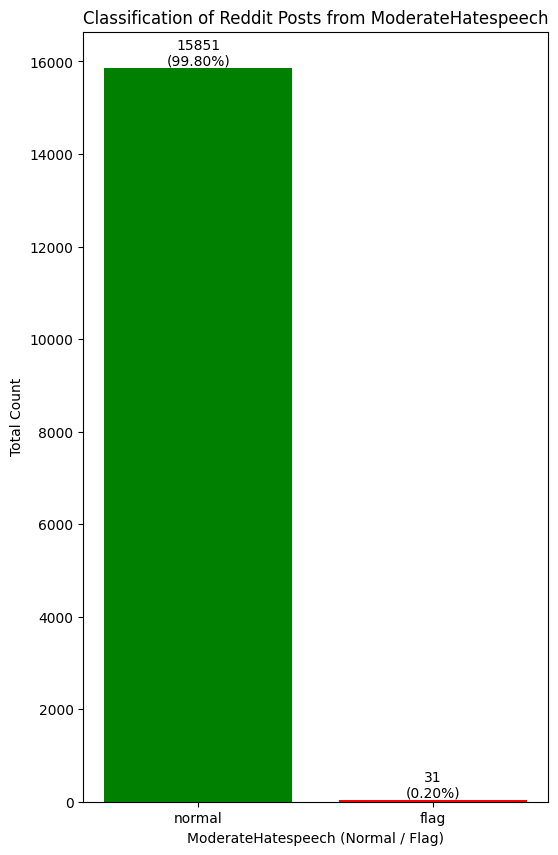

In [10]:
reddit_posts_ModerateHatespeech(subreddit_posts)

In [11]:
def youtube_videos_ModerateHatespeech(youtube_channel_videos):
    # Plotting the histogram
    plt.figure(figsize=(6, 10))
    
    # Count occurrences of 'yes' and 'no'
    youtube_videos_flag_counts = youtube_channel_videos['ycv_class'].fillna('normal').value_counts()
    
    # Plotting the histogram
    bars = plt.bar(youtube_videos_flag_counts.index, youtube_videos_flag_counts.values, color=['blue', 'red'])
    
    # Annotate each bar with count and ratio
    for bar, count in zip(bars, youtube_videos_flag_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({count / len(youtube_channel_videos):.2%})', ha='center', va='bottom')
    # Customize the plot
    plt.title('Classification of Youtube Videos from ModerateHatespeech')
    plt.xlabel('ModerateHatespeech (Normal / Flag)')
    plt.ylabel('Total Count')
    #plt.legend()
    plt.savefig('Classification of Youtube Videos from ModerateHatespeech.jpg')
    # Display the plot
    #plt.show()

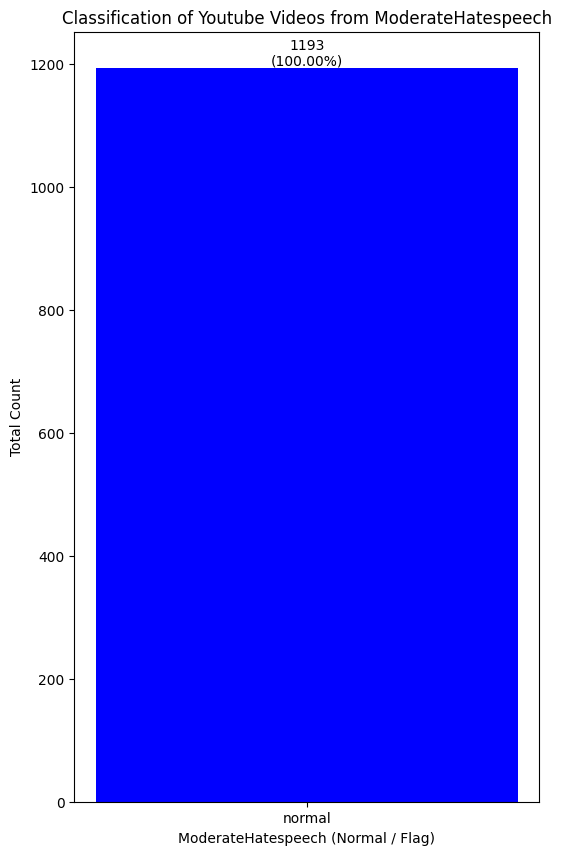

In [12]:
youtube_videos_ModerateHatespeech(youtube_channel_videos)

In [13]:
def reddit_comments_ModerateHatespeech(subreddit_posts_comments):
    # Plotting the histogram
    plt.figure(figsize=(6, 10))
    
    # Count occurrences of 'yes' and 'no'
    subreddt_comment_flag_counts = subreddit_posts_comments['comment_class'].value_counts()
    
    # Plotting the histogram
    bars = plt.bar(subreddt_comment_flag_counts.index, subreddt_comment_flag_counts.values, color=['green', 'red'])
    
    # Annotate each bar with count and ratio
    for bar, count in zip(bars, subreddt_comment_flag_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({count / len(subreddit_posts_comments):.2%})', ha='center', va='bottom')
    # Customize the plot
    plt.title('Classification of Reddit Comments from ModerateHatespeech')
    plt.xlabel('ModerateHatespeech (Normal / Flag)')
    plt.ylabel('Total Count')
    #plt.legend()
    plt.savefig('Classification of Reddit Comments from ModerateHatespeech.jpg')
    # Display the plot
    #plt.show()
    
    

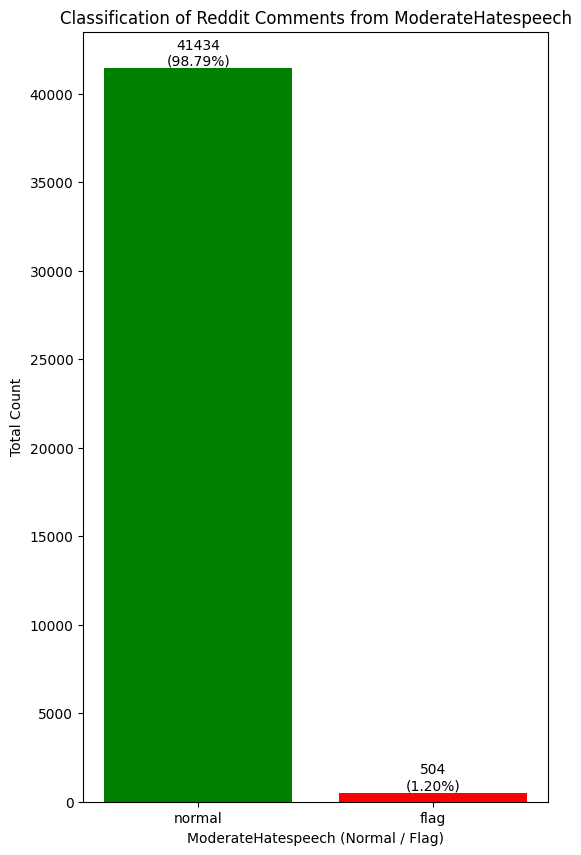

In [14]:
reddit_comments_ModerateHatespeech(subreddit_posts_comments)

In [15]:
def youtube_comments_ModerateHatespeech(youtube_videos_comments):
    #Plotting the histogram
    plt.figure(figsize=(6, 10))
    
    # Count occurrences of 'yes' and 'no'
    youtube_comment_flag_counts = youtube_videos_comments['ycvc_class'].value_counts()
    
    # Plotting the histogram
    bars = plt.bar(youtube_comment_flag_counts.index, youtube_comment_flag_counts.values, color=['green', 'red'])
    
    # Annotate each bar with count and ratio
    for bar, count in zip(bars, youtube_comment_flag_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}\n({count / len(youtube_videos_comments):.2%})', ha='center', va='bottom')
    # Customize the plot
    plt.title('Classification of Youtube Comments from ModerateHatespeech')
    plt.xlabel('ModerateHatespeech (Normal / Flag)')
    plt.ylabel('Total Count')
    #plt.legend()
    plt.savefig('Classification of Youtube Comments from ModerateHatespeech.jpg')
    # Display the plot
    #plt.show()

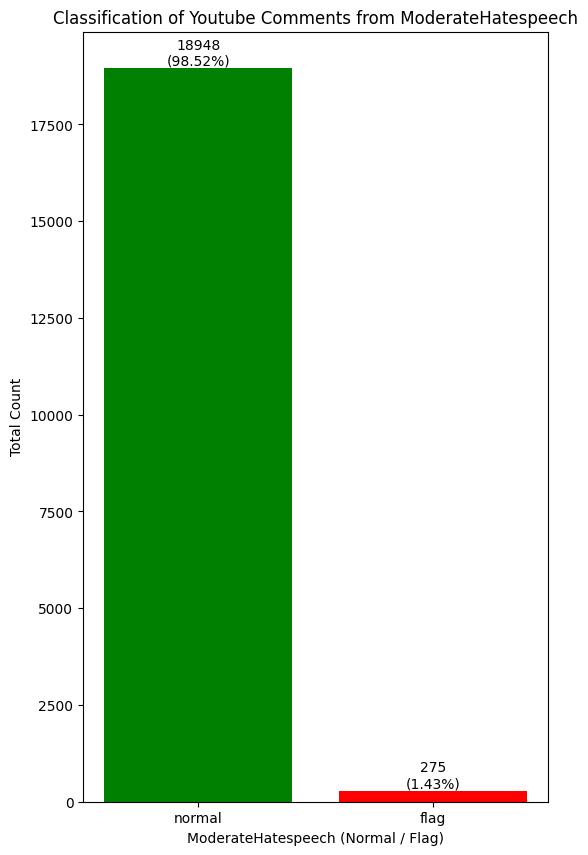

In [16]:
youtube_comments_ModerateHatespeech(youtube_videos_comments)

In [17]:
def content_popularity_analysis(df, column_name, title, img_name):
    titles = df[column_name].tolist()  # Assuming 'post_title' is the column name
    words = nltk.word_tokenize(' '.join(titles).lower())
    words = [word for word in words if word.isalpha() and word not in nltk.corpus.stopwords.words('english')]
    word_freq = Counter(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(img_name+'.jpg')
    #plt.show()

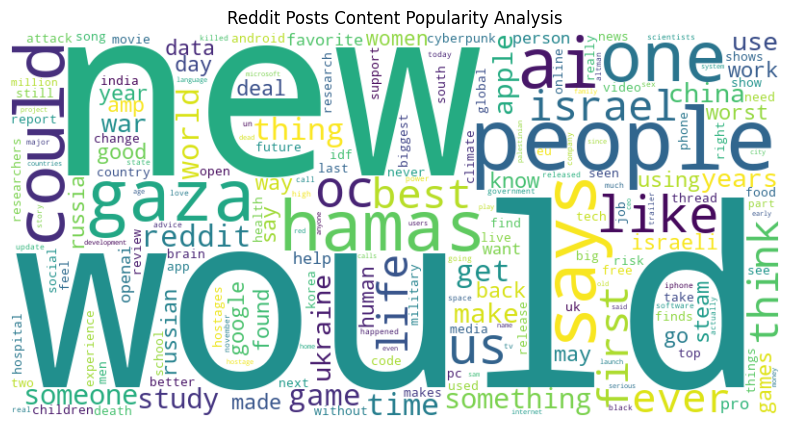

In [18]:
content_popularity_analysis(subreddit_posts, 'post_title', 'Reddit Posts Content Popularity Analysis','Reddit Posts Content Popularity Analysis')

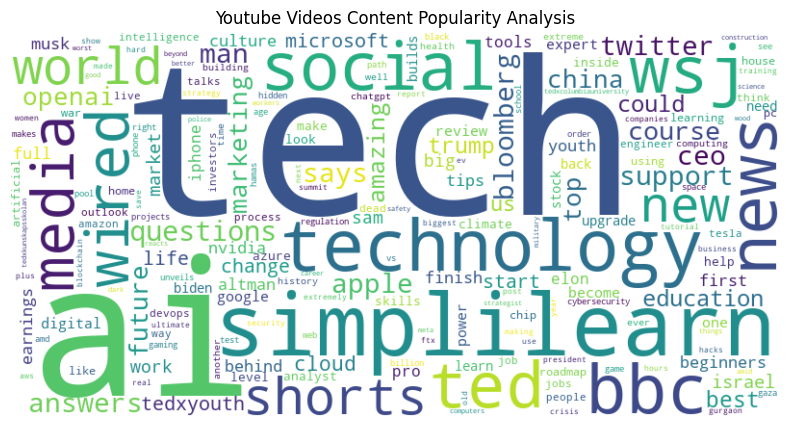

In [19]:
content_popularity_analysis(youtube_channel_videos, 'ycv_name_title', 'Youtube Videos Content Popularity Analysis','Youtube Videos Content Popularity Analysis')

In [20]:
def sentiment_analysis(comments):
    # Categorize sentiments
    positive, negative, neutral = 0, 0, 0
    for comment in comments:
        analysis = TextBlob(str(comment))
        if analysis.sentiment.polarity > 0:
            positive += 1
        elif analysis.sentiment.polarity < 0:
            negative += 1
        else:
            neutral += 1

    # Data to plot
    categories = ['Positive', 'Negative', 'Neutral']
    counts = [positive, negative, neutral]
    colors = ['green', 'red', 'blue']

    # Plot
    plt.bar(categories, counts, color=colors)
    plt.title('Sentiment Analysis of Reddit Comments and Youtube Comments')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Sentiment Polarity Count')
    plt.savefig('Sentiment Analysis of Reddit Comments and Youtube Comments.jpg')
    # Display the plot
    #plt.show()
    #return counts

In [21]:
comments = subreddit_posts_comments['comment_body'].tolist() + youtube_videos_comments['ycvc_body'].tolist()

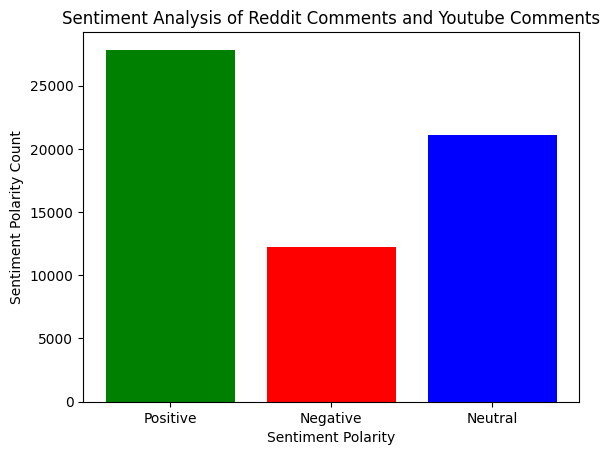

In [22]:
sentiment_analysis(comments)

In [23]:
def subreddit_engagement_metrics_analysis(subreddit_posts_comments, subreddit):
    # Assuming 'subreddit_id', 'subreddit_subscribers', and 'comment_id' columns exist in your DataFrame
    # Merge the dataframes on 'subreddit_id'
    plt.figure(figsize=(10,20))
    subreddit_merged_df = pd.merge(subreddit_posts_comments, subreddit, on='subreddit_id', how='inner')
    grouped_data = subreddit_merged_df.groupby('subreddit_id').agg({'subreddit_subscribers': 'first', 'comment_id': 'count'}).reset_index()
    grouped_data.columns = ['subreddit_id', 'subscribers', 'comment_count']
    sns.pairplot(grouped_data[['subscribers', 'comment_count']])
    plt.xlabel('Subreddit Engagement Metrics Analysis (Engagement of Subscribers with respect to Comments)')
    plt.savefig('Subreddit Engagement Metrics Analysis.jpg')
    plt.suptitle('Subreddit Engagement Metrics Analysis (Engagement of Subscribers with respect to Comments)', y=-0.05, va='bottom')  # Adjust the y parameter for positioning
    #plt.show()

<Figure size 1000x2000 with 0 Axes>

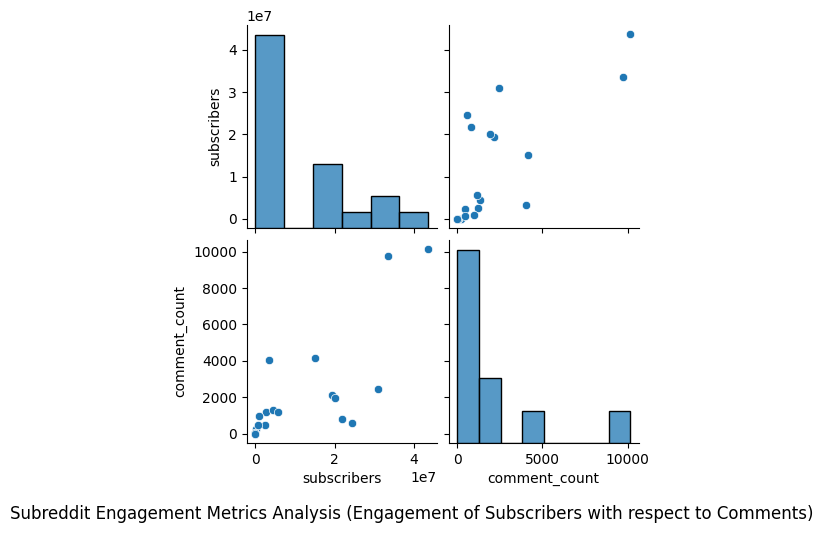

In [24]:
subreddit_engagement_metrics_analysis(subreddit_posts_comments, subreddit)

In [25]:
def youtube_engagement_metrics_analysis(youtube_channels):
    # Merge the dataframes on 'youtube_channel_id'
    yc = youtube_channels.copy()
    # Extract 'subscribers' from 'yc_data'
    subscribers = yc['yc_data'].apply(ast.literal_eval).apply(lambda x: int(x['statistics']['subscriberCount']))

    # Update the DataFrame with 'subscribers'
    yc['subscribers'] = subscribers
    youtube_merged_df = pd.merge(youtube_videos_comments, yc, on='youtube_channel_id', how='inner')
    # Group data and plot
    grouped_data = youtube_merged_df.groupby('youtube_channel_id').agg({'subscribers': 'first', 'ycvcomment_id': 'count'}).reset_index()
    grouped_data.columns = ['youtube_channel_id', 'subscribers', 'comment_count']
    sns.pairplot(grouped_data[['subscribers', 'comment_count']])
    #plt.xlabel('Subreddit Engagement Metrics Analysis (Engagement of Subscribers with respect to Comments)')
    plt.savefig('Youtube Engagement Metrics Analysis.jpg')
    plt.suptitle('Youtube Engagement Metrics Analysis (Engagement of Subscribers with respect to Comments)', y=-0.05, va='bottom')
    #plt.show()

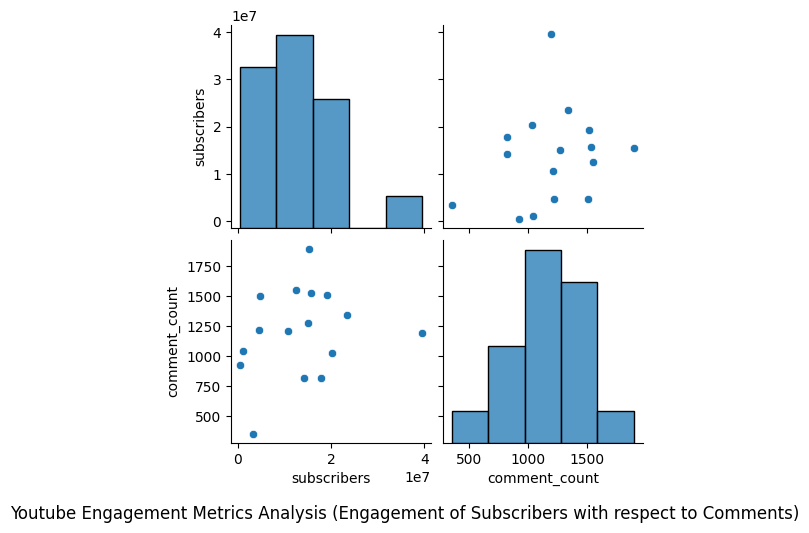

In [26]:
youtube_engagement_metrics_analysis(youtube_channels)